## Importing needed libraries 

In [1040]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt 
import seaborn as sns

## Reading dataset 

In [1041]:
data = pd.read_csv("C:/Users/DELL/Downloads/prosperLoanData.csv")

In [1042]:
data

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


In [1043]:
data.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [1044]:
data.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [1045]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [1046]:
sum(data.duplicated())

0

In [1047]:
# check for missing values
data.isnull().sum().values

array([     0,      0,      0,  84984,      0,      0,  58848,     25,
            0,      0,  29084,  29084,  29084,  29084,  29084,  29084,
            0,   5515,   3588,   2255,   7625,      0,      0, 100596,
            0,    591,    591,    697,   7604,   7604,    697,      0,
            0,    697,   1159,    697,   7622,    990,    697,   7604,
         7604,   7604,   7544,   7544,   7544,   7544,   8554,      0,
            0,      0,      0,  91852,  91852,  91852,  91852,  91852,
        91852,  91852,  95009,      0,  96985,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0], dtype=int64)

In [1048]:
data.drop(['GroupKey','LoanKey','LoanNumber','LoanFirstDefaultedCycleNumber','ListingCategory (numeric)','LoanOriginationQuarter','MemberKey','FirstRecordedCreditLine','ListingKey','ListingNumber'],axis=1,inplace=True)

## Handling missing values 

In [1049]:
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[num_cols] = data[num_cols].fillna(data[num_cols].mean())

cat_cols = data.select_dtypes(include=['category','object']).columns
data[cat_cols] = data[cat_cols].fillna(data[cat_cols].mode().iloc[0])

In [1050]:
data.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0], dtype=int64)

In [1051]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 71 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingCreationDate                  113937 non-null  object 
 1   CreditGrade                          113937 non-null  object 
 2   Term                                 113937 non-null  int64  
 3   LoanStatus                           113937 non-null  object 
 4   ClosedDate                           113937 non-null  object 
 5   BorrowerAPR                          113937 non-null  float64
 6   BorrowerRate                         113937 non-null  float64
 7   LenderYield                          113937 non-null  float64
 8   EstimatedEffectiveYield              113937 non-null  float64
 9   EstimatedLoss                        113937 non-null  float64
 10  EstimatedReturn                      113937 non-null  float64
 11  ProsperRating

## Datatype correction 

In [1052]:
data['LoanOriginationDate'] = pd.to_datetime(data['LoanOriginationDate'])
data['ListingCreationDate'] = pd.to_datetime(data['ListingCreationDate'])
data['DateCreditPulled'] = pd.to_datetime(data['DateCreditPulled'])
data['ClosedDate'] = pd.to_datetime(data['ClosedDate'])

In [1053]:
data

,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,2007-08-26 19:09:29.263,C,36,Completed,2009-08-14,0.16516,0.1580,0.1380,0.168661,0.080306,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,2014-02-27 08:28:07.900,C,36,Current,2014-03-04,0.12016,0.0920,0.0820,0.079600,0.024900,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,2007-01-05 15:00:47.090,HR,36,Completed,2009-12-17,0.28269,0.2750,0.2400,0.168661,0.080306,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,2012-10-22 11:02:35.010,C,36,Current,2014-03-04,0.12528,0.0974,0.0874,0.084900,0.024900,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,2013-09-14 18:38:39.097,C,36,Current,2014-03-04,0.24614,0.2085,0.1985,0.183160,0.092500,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,2013-04-14 05:55:02.663,C,36,Current,2014-03-04,0.22354,0.1864,0.1764,0.164900,0.069900,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,2011-11-03 20:42:55.333,C,36,FinalPaymentInProgress,2014-03-04,0.13220,0.1110,0.1010,0.100700,0.020000,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,2013-12-13 05:49:12.703,C,60,Current,2014-03-04,0.23984,0.2150,0.2050,0.188280,0.102500,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,2011-11-14 13:18:26.597,C,60,Completed,2013-08-13,0.28408,0.2605,0.2505,0.244500,0.085000,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


### Univariate EDA

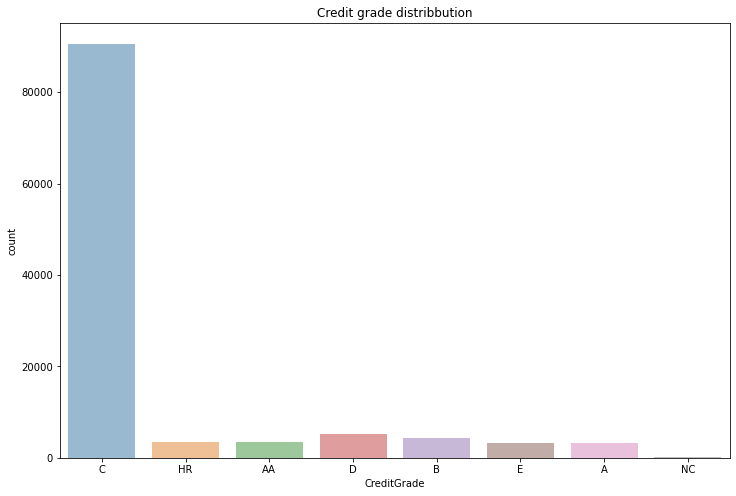

In [1054]:
plt.figure(figsize=(12,8))
plt.title("Credit grade distribbution")
sns.countplot(data=data, x='CreditGrade',alpha=0.5)
plt.show()

### Most common Creditgrade is 'C' 

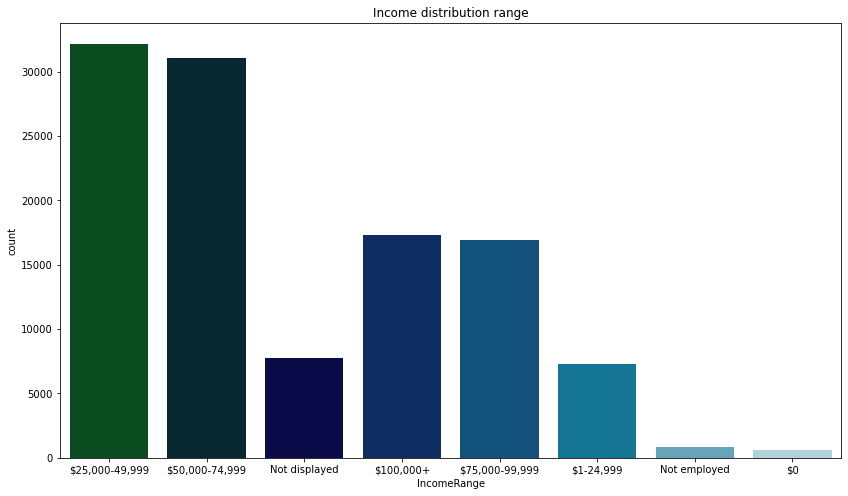

In [1055]:
plt.figure(figsize=(14,8))
plt.title("Income distribution range")
sns.countplot(data=data, x='IncomeRange',palette='ocean')
plt.show()

###  From the graph above, we deduced that highest income for an employee is 25 million while the average is between 100,000 and 75,000

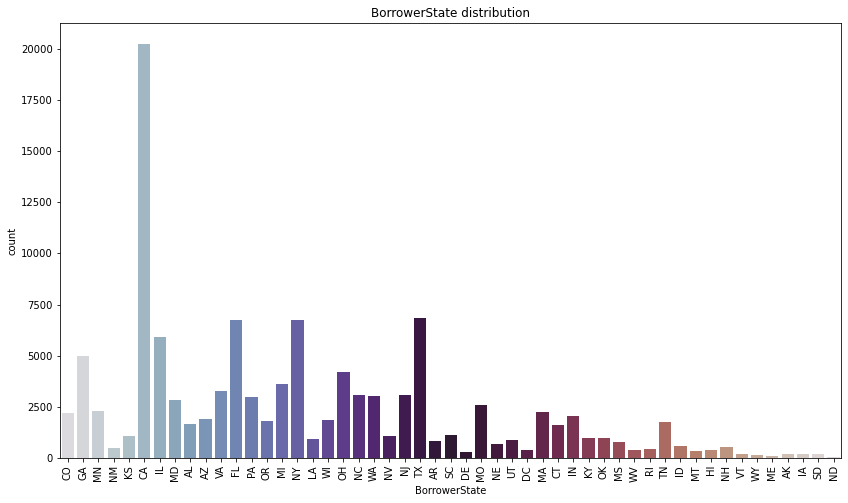

In [1056]:
plt.figure(figsize=(14,8))
plt.title("BorrowerState distribution")
sns.countplot(data=data, x='BorrowerState',palette='twilight')
plt.xticks(rotation=90)
plt.show()


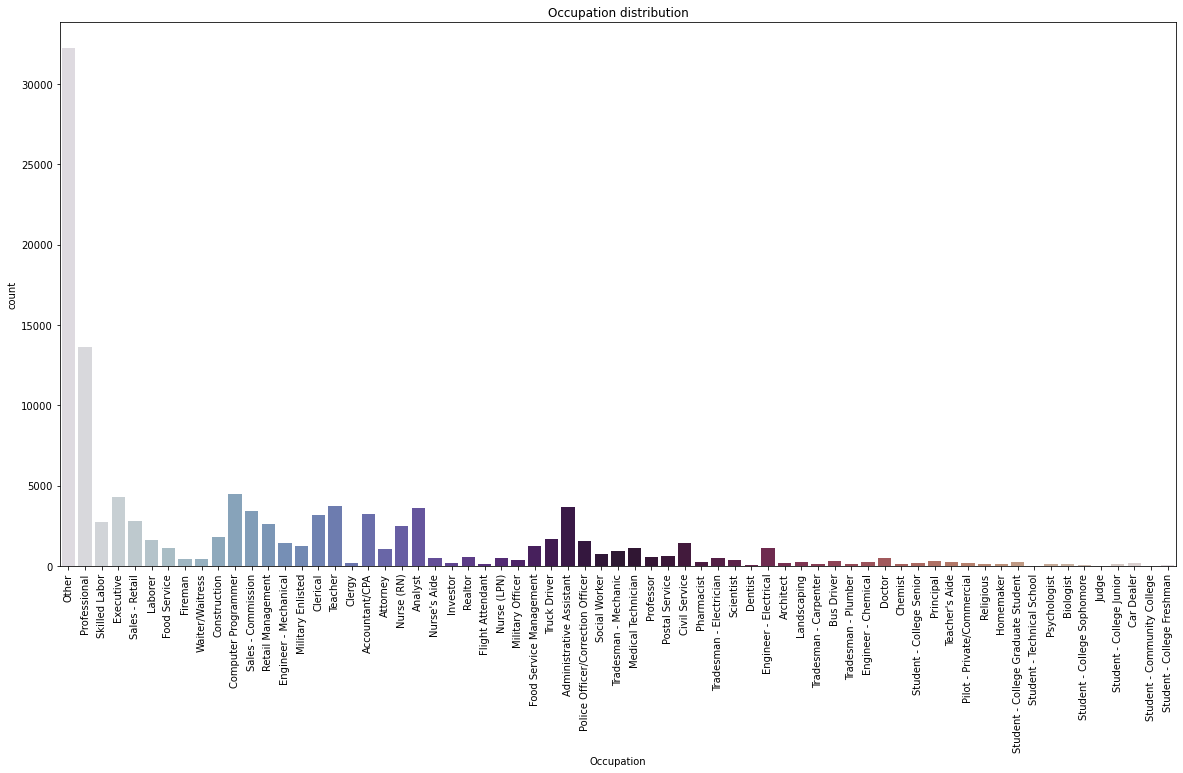

In [1057]:
plt.figure(figsize=(20,10))
plt.title("Occupation distribution")
sns.countplot(data=data, x='Occupation',palette='twilight')
plt.xticks(rotation=90)
plt.show()

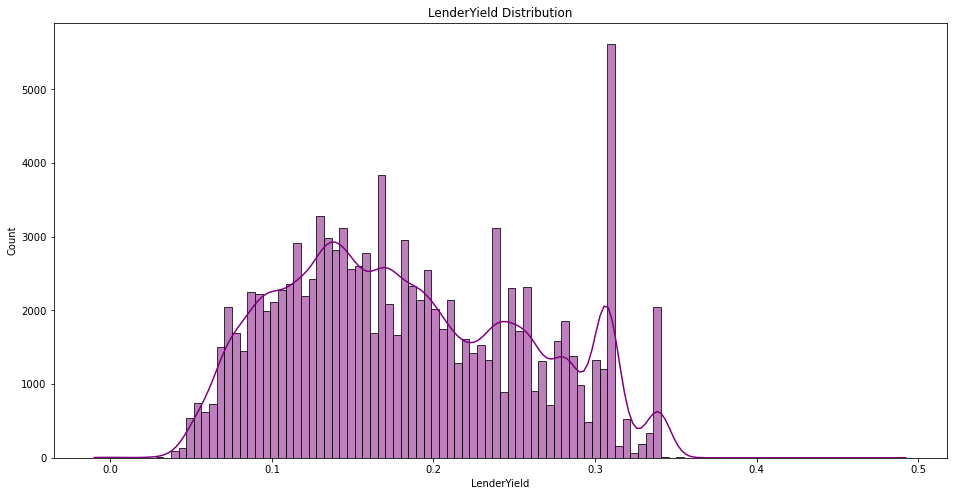

In [1058]:
plt.figure(figsize=(16,8))
plt.title("LenderYield Distribution")
sns.histplot(data=data, x='LenderYield', kde=True,color = 'purple')
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


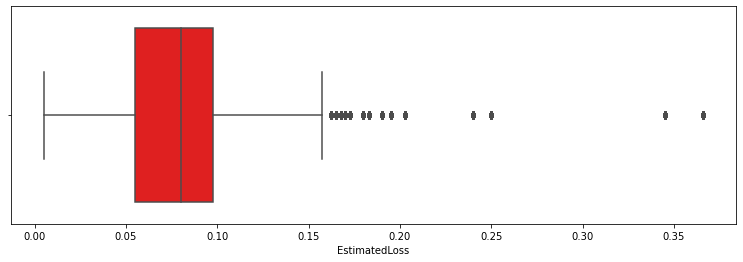

In [1059]:
plt.figure(figsize = (13,4))
sns.boxplot(data.EstimatedLoss,color='red');

### Estimated loss is found between 0.05 to 0.1 

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


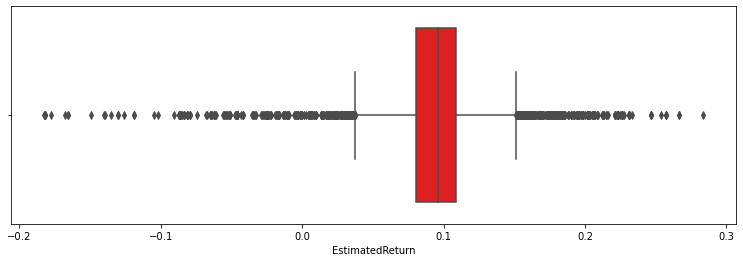

In [1060]:
plt.figure(figsize = (13,4))
sns.boxplot(data.EstimatedReturn,color='red');

### Most estimated return is located at 0.1 

## EDA 

### Bivariante EDA

<AxesSubplot:xlabel='BorrowerRate', ylabel='LoanStatus'>

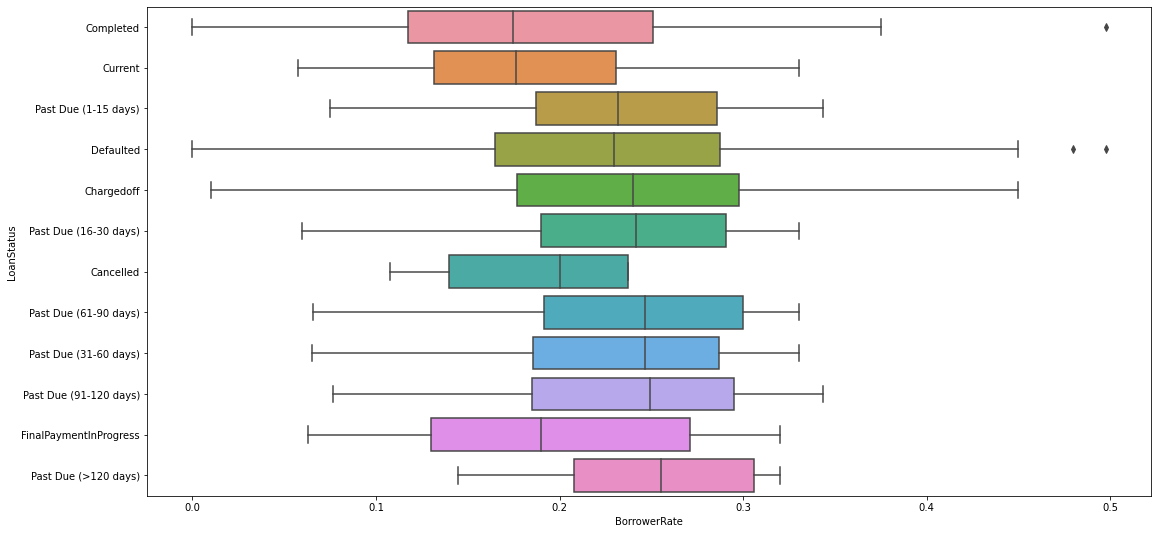

In [1061]:
plt.figure(figsize = (18,9))
sns.boxplot(data=data, x="BorrowerRate", y="LoanStatus")

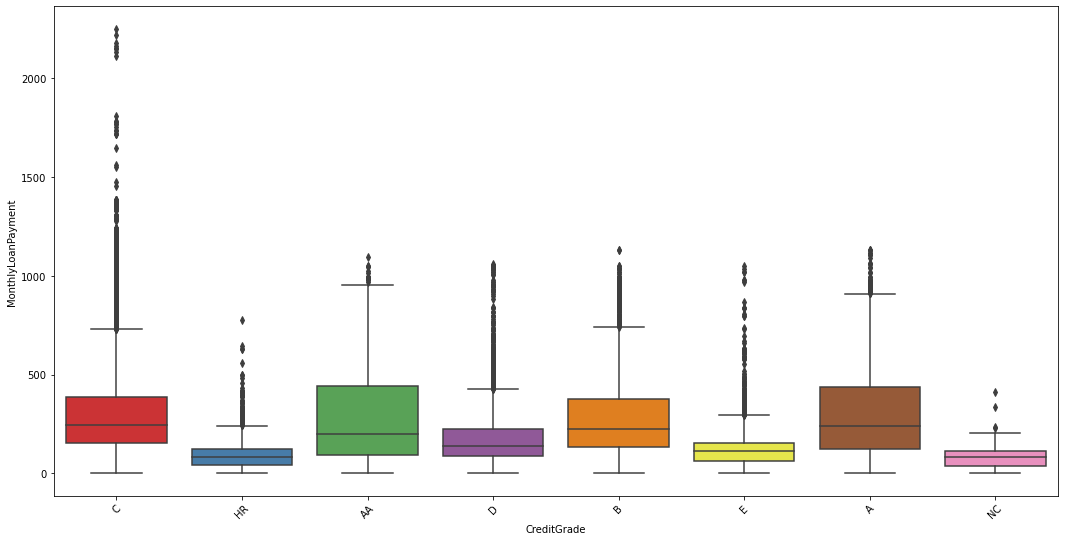

In [1062]:
plt.figure(figsize = (18,9))
ax=sns.boxplot(x='CreditGrade', y='MonthlyLoanPayment', data=data, palette="Set1")
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

## Removing Outliers 

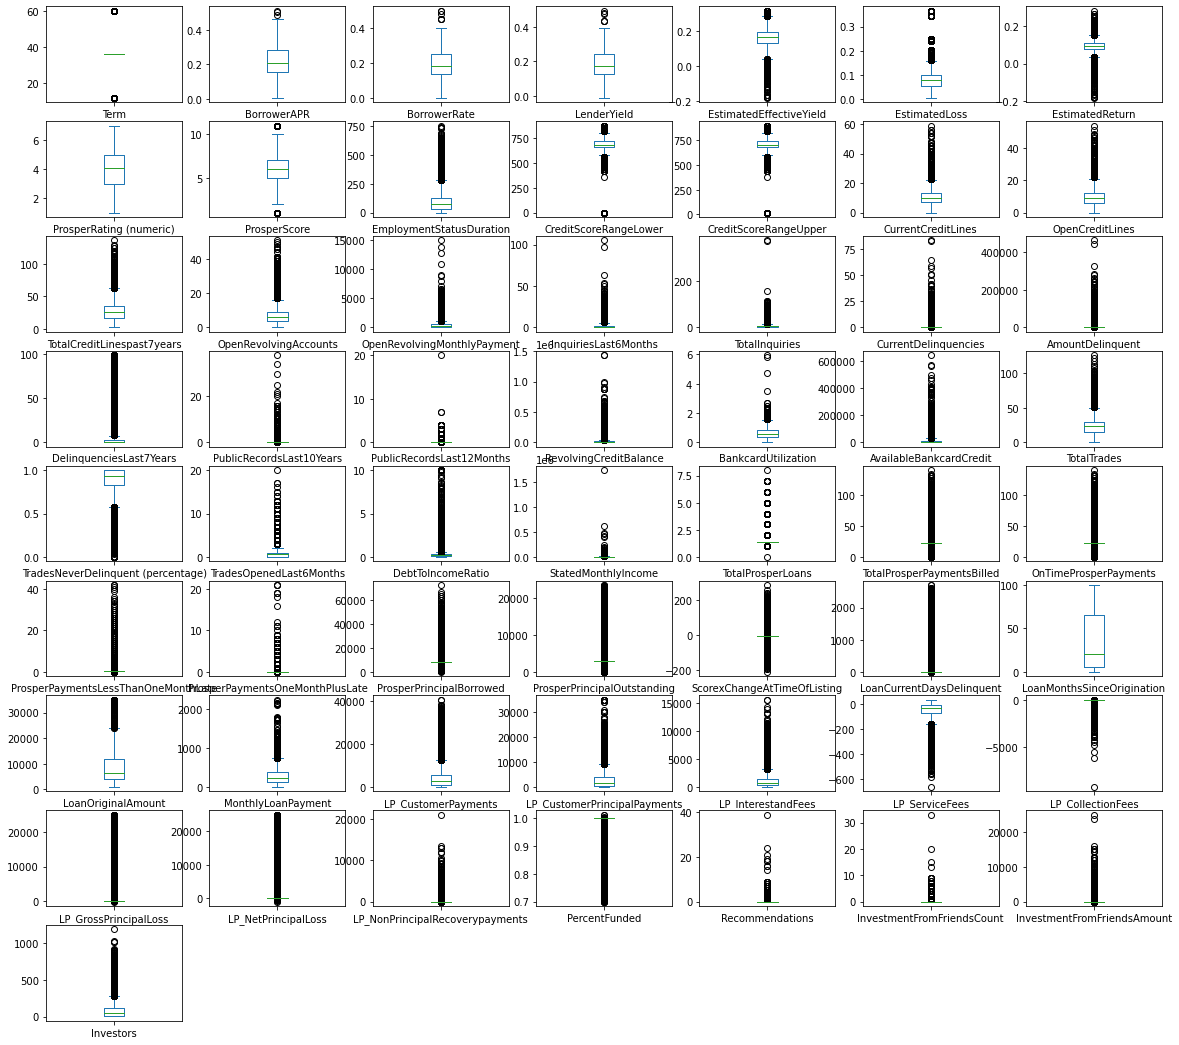

In [1063]:
data.plot(kind = "box" , subplots = True , layout= (12,7), figsize =(20,25) )
plt.show()

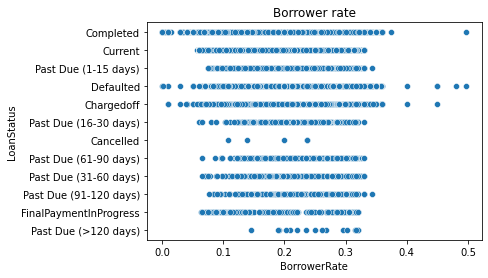

In [1064]:
sns.scatterplot(x=data['BorrowerRate'],y=data['LoanStatus'])
plt.title('Borrower rate')
data=data[data['BorrowerRate']<0.4]

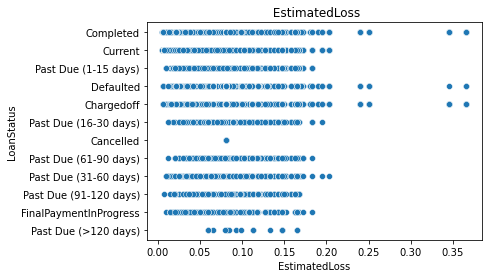

In [1065]:
sns.scatterplot(x=data['EstimatedLoss'],y=data['LoanStatus'])
plt.title(' EstimatedLoss')
data=data[data['EstimatedLoss']<0.2]

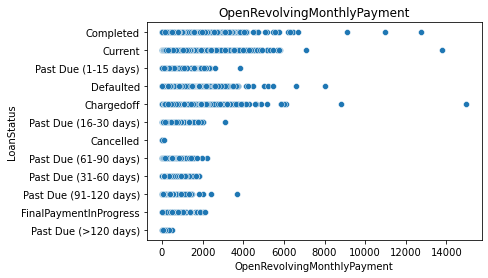

In [1066]:
sns.scatterplot(x=data['OpenRevolvingMonthlyPayment'],y=data['LoanStatus'])
plt.title('OpenRevolvingMonthlyPayment')
data=data[data['OpenRevolvingMonthlyPayment']<6000]

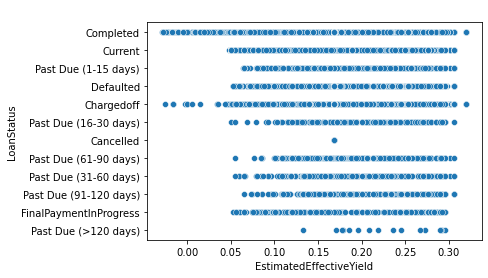

In [1067]:
sns.scatterplot(x=data['EstimatedEffectiveYield'],y=data['LoanStatus'])
plt.title(' ')
data=data[data['EstimatedEffectiveYield']>0]

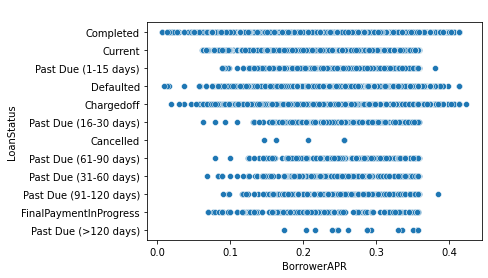

In [1068]:
sns.scatterplot(x=data['BorrowerAPR'],y=data['LoanStatus'])
plt.title(' ')
data=data[data['BorrowerAPR']<0.35]

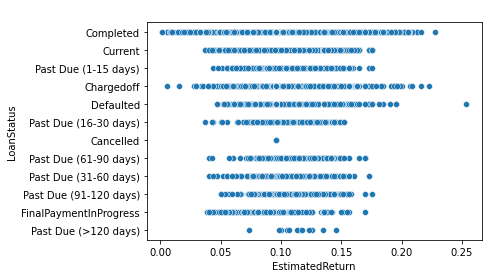

In [1069]:
sns.scatterplot(x=data['EstimatedReturn'],y=data['LoanStatus'])
plt.title(' ')
data=data[data['EstimatedReturn']<0.2]

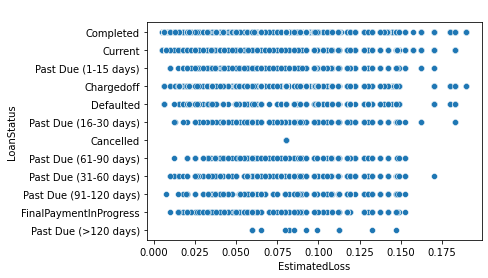

In [1070]:
sns.scatterplot(x=data['EstimatedLoss'],y=data['LoanStatus'])
plt.title(' ')
data=data[data['EstimatedLoss']<0.15]

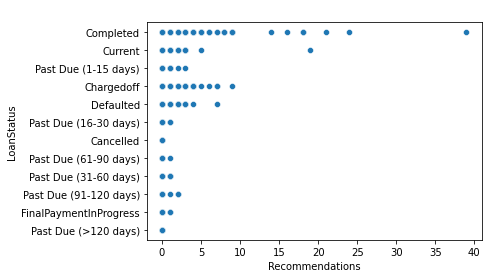

In [1071]:
sns.scatterplot(x=data['Recommendations'],y=data['LoanStatus'])
plt.title(' ')
data=data[data['Recommendations']<10]

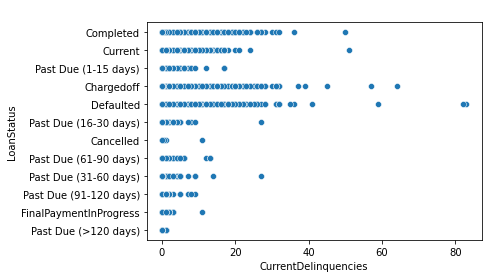

In [1072]:
sns.scatterplot(x=data['CurrentDelinquencies'],y=data['LoanStatus'])
plt.title(' ')
data=data[data['CurrentDelinquencies']<30]

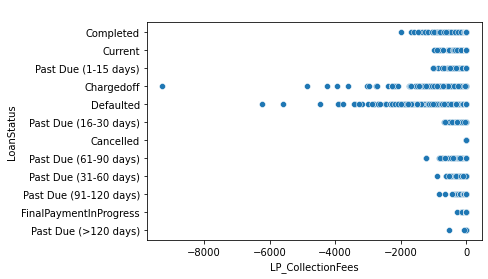

In [1073]:
sns.scatterplot(x=data['LP_CollectionFees'],y=data['LoanStatus'])
plt.title(' ')
data=data[data['LP_CollectionFees']>-3000]

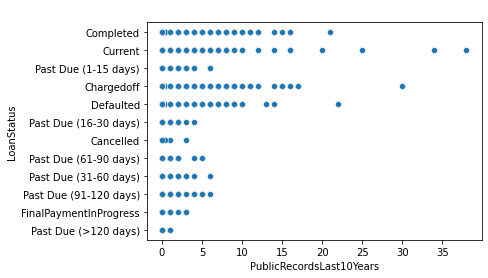

In [1074]:
sns.scatterplot(x=data['PublicRecordsLast10Years'],y=data['LoanStatus'])
plt.title(' ')
data=data[data['PublicRecordsLast10Years']<12]

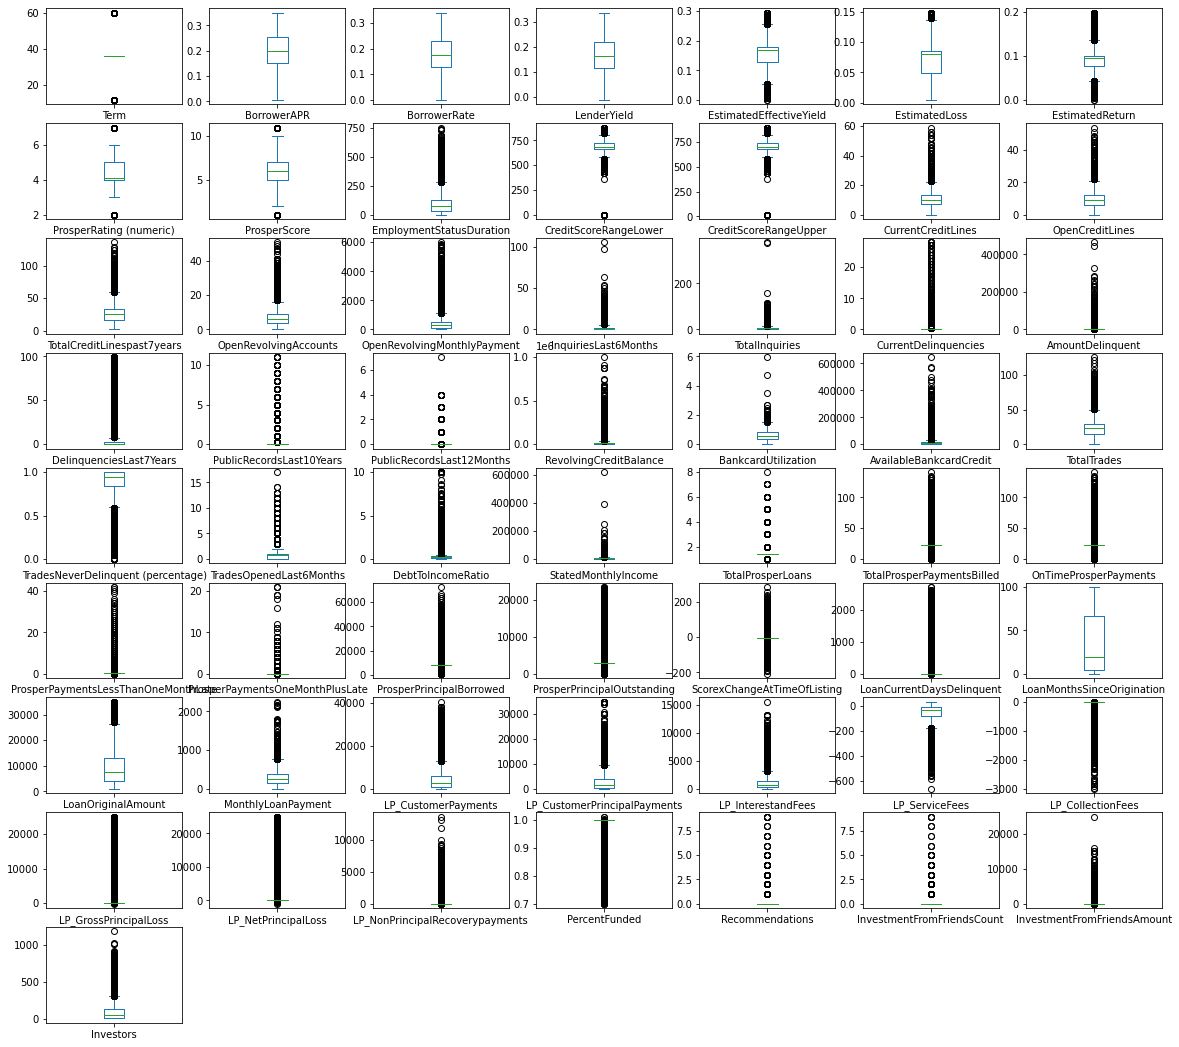

In [1075]:
data.plot(kind = "box" , subplots = True , layout= (12,7), figsize =(20,25) )
plt.show()

## Label encoding 

In [1076]:
for i in data.columns:
    if data[i].dtype=='object'or data[i].dtype== 'bool':
            label_encoder=LabelEncoder()
            data[i]=label_encoder.fit_transform(data[i])


In [1077]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102574 entries, 0 to 113936
Data columns (total 71 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ListingCreationDate                  102574 non-null  datetime64[ns]
 1   CreditGrade                          102574 non-null  int32         
 2   Term                                 102574 non-null  int64         
 3   LoanStatus                           102574 non-null  int32         
 4   ClosedDate                           102574 non-null  datetime64[ns]
 5   BorrowerAPR                          102574 non-null  float64       
 6   BorrowerRate                         102574 non-null  float64       
 7   LenderYield                          102574 non-null  float64       
 8   EstimatedEffectiveYield              102574 non-null  float64       
 9   EstimatedLoss                        102574 non-null  float64       
 

### Converting target column into binary

- by reading from this source (https://www.lendingtree.com/debt-consolidation/delinquent-on debt/#:~:text=120%20to%20180%20days%20late, By%20now%2C%20a&text=If%20you%20have%20a%20delinquent,a%20third%2Dparty%20collection%20agency.)
- we could deduce that after 120-180 days .By now, a creditor will be far less willing to work with you. If you have a delinquent mortgage, your lender might start foreclosure proceedings, although this will vary according to your state of residence. For other types of debt — if payment is 120 days late — a creditor will probably pass it along to a third-party collection agency.

In [1078]:
data.loc[data['LoanCurrentDaysDelinquent'] >= 180, 'LoanStatus'] = 'Defaulter'
data.loc[data['LoanCurrentDaysDelinquent'] < 180, 'LoanStatus'] = 'non_defaulter'

In [1079]:
data['LoanStatus'].replace('non_defaulter',0 , inplace=True)
data['LoanStatus'].replace('Defaulter',1 , inplace=True)
data.loc[data['ClosedDate'].isnull(), 'LoanStatus'] = 'Defaulted'

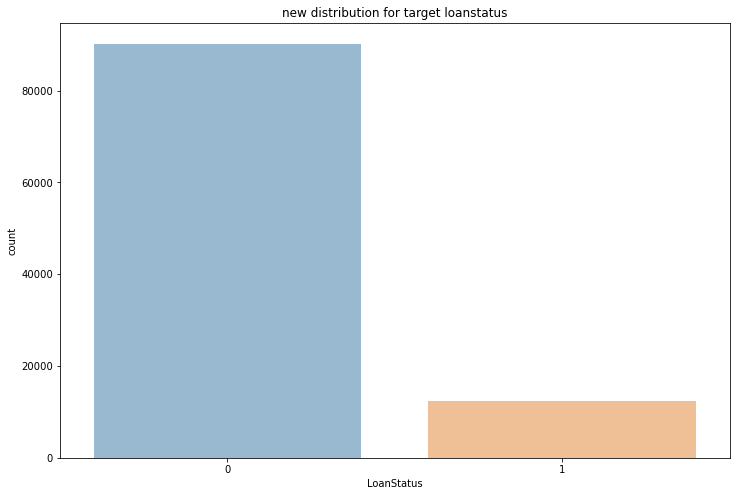

In [1080]:
plt.figure(figsize=(12,8))
plt.title("new distribution for target loanstatus")
sns.countplot(data=data, x='LoanStatus',alpha=0.5)
plt.show()

## Feature engineering and features selection 

In [1081]:
unwanted_features=['ClosedDate','LoanOriginationDate','ListingCreationDate','DateCreditPulled','LoanCurrentDaysDelinquent','LP_NetPrincipalLoss','InvestmentFromFriendsAmount','LP_GrossPrincipalLoss','InvestmentFromFriendsCount','ProsperPaymentsLessThanOneMonthLate','ProsperPaymentsOneMonthPlusLate','LP_CollectionFees','Recommendations', 'PercentFunded',
'TotalProsperLoans','DebtToIncomeRatio','Occupation','IsBorrowerHomeowner','OnTimeProsperPayments','PublicRecordsLast10Years','EstimatedEffectiveYield','LoanMonthsSinceOrigination']

In [1082]:
data= data.drop(unwanted_features,axis=1)

In [1084]:
X= data.drop('LoanStatus', axis=1)
y = data['LoanStatus']

In [1085]:
X

,CreditGrade,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,...,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_NonPrincipalRecoverypayments,Investors
0,3,36,0.16516,0.1580,0.1380,0.080306,0.096068,4.072243,3,5.950067,...,2930.313906,-3.223214,9425,330.43,11396.1400,9425.00,1971.1400,-133.18,0.0,258
1,3,36,0.12016,0.0920,0.0820,0.024900,0.054700,6.000000,0,7.000000,...,2930.313906,-3.223214,10000,318.93,0.0000,0.00,0.0000,0.00,0.0,1
2,6,36,0.28269,0.2750,0.2400,0.080306,0.096068,4.072243,3,5.950067,...,2930.313906,-3.223214,3001,123.32,4186.6300,3001.00,1185.6300,-24.20,0.0,41
3,3,36,0.12528,0.0974,0.0874,0.024900,0.060000,6.000000,0,9.000000,...,2930.313906,-3.223214,10000,321.45,5143.2000,4091.09,1052.1100,-108.01,0.0,158
4,3,36,0.24614,0.2085,0.1985,0.092500,0.090660,3.000000,4,4.000000,...,9947.900000,-3.223214,15000,563.97,2819.8500,1563.22,1256.6300,-60.27,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,3,36,0.22354,0.1864,0.1764,0.069900,0.095000,4.000000,3,5.000000,...,2930.313906,-3.223214,10000,364.74,3647.4000,2238.38,1409.0200,-75.58,0.0,1
113933,3,36,0.13220,0.1110,0.1010,0.020000,0.080700,6.000000,0,8.000000,...,4815.420000,-26.000000,2000,65.57,2330.5500,1997.16,333.3900,-30.05,0.0,22
113934,3,60,0.23984,0.2150,0.2050,0.102500,0.085780,3.000000,4,3.000000,...,2930.313906,-3.223214,10000,273.35,546.7000,183.15,363.5500,-16.91,0.0,119
113935,3,60,0.28408,0.2605,0.2505,0.085000,0.159500,4.000000,3,5.000000,...,3264.370000,-4.000000,15000,449.55,21122.5600,15000.00,6122.5600,-235.05,0.0,274


In [1086]:
# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

In [1087]:
discrete_features = X.dtypes == int
discrete_features

CreditGrade                            True
Term                                  False
BorrowerAPR                           False
BorrowerRate                          False
LenderYield                           False
EstimatedLoss                         False
EstimatedReturn                       False
ProsperRating (numeric)               False
ProsperRating (Alpha)                  True
ProsperScore                          False
BorrowerState                          True
EmploymentStatus                       True
EmploymentStatusDuration              False
CurrentlyInGroup                      False
CreditScoreRangeLower                 False
CreditScoreRangeUpper                 False
CurrentCreditLines                    False
OpenCreditLines                       False
TotalCreditLinespast7years            False
OpenRevolvingAccounts                 False
OpenRevolvingMonthlyPayment           False
InquiriesLast6Months                  False
TotalInquiries                  

In [1088]:
from sklearn.feature_selection import mutual_info_regression
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=True)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores# show a few features with their MI scores

IncomeVerifiable                      0.000000
ProsperPrincipalBorrowed              0.000767
ProsperPrincipalOutstanding           0.001443
TotalCreditLinespast7years            0.003082
DelinquenciesLast7Years               0.005366
TotalProsperPaymentsBilled            0.005670
BorrowerState                         0.007802
ScorexChangeAtTimeOfListing           0.010354
EmploymentStatusDuration              0.013000
LoanOriginalAmount                    0.014098
Term                                  0.014834
StatedMonthlyIncome                   0.015318
OpenRevolvingAccounts                 0.016499
LP_InterestandFees                    0.016989
TotalTrades                           0.017408
CurrentDelinquencies                  0.017489
TradesOpenedLast6Months               0.017602
OpenRevolvingMonthlyPayment           0.017991
PublicRecordsLast12Months             0.018600
LP_ServiceFees                        0.019353
AmountDelinquent                      0.020363
CurrentCredit

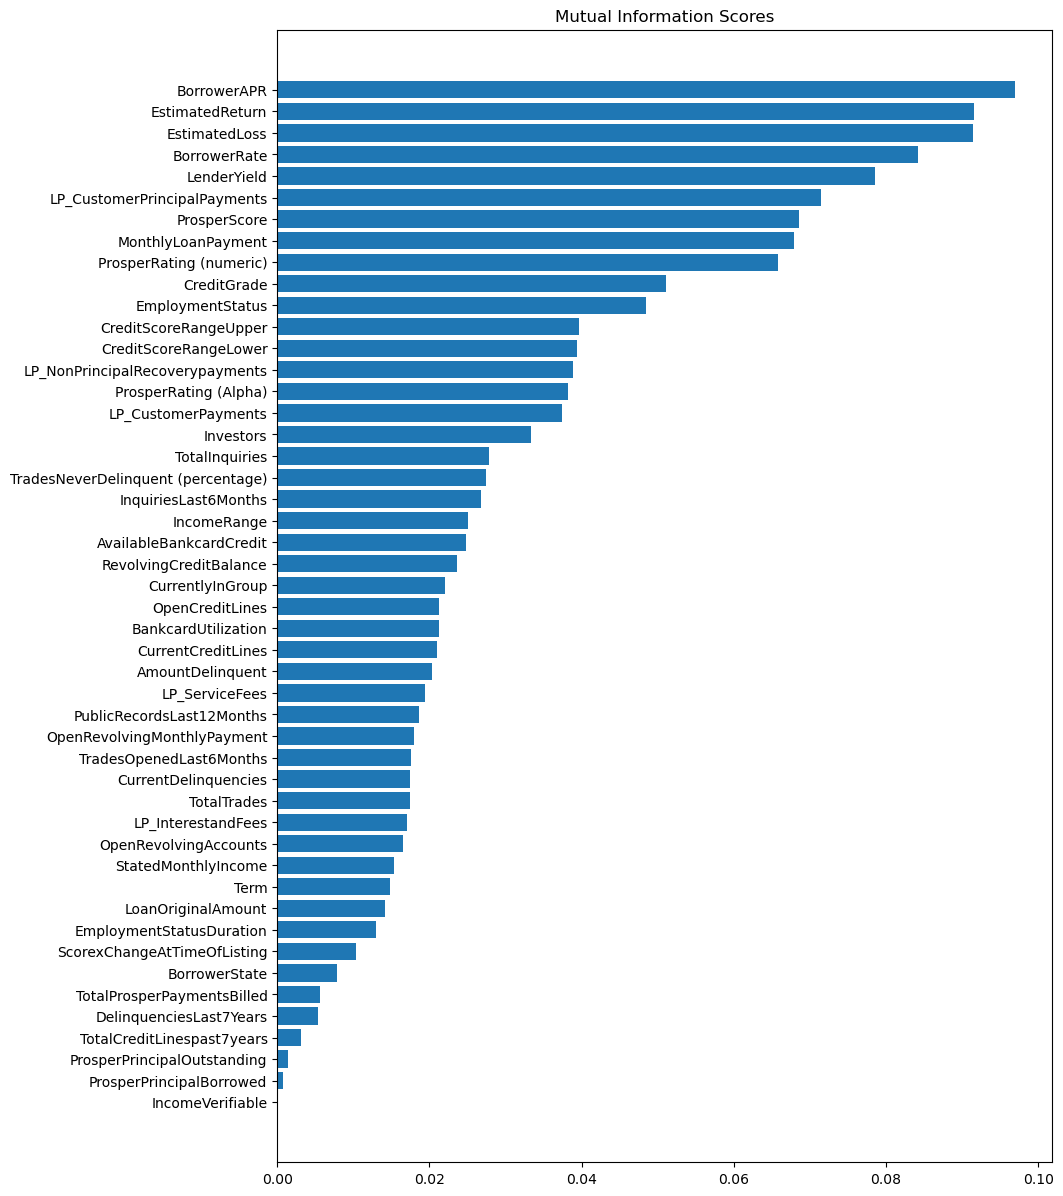

In [1089]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(10, 15))
plot_mi_scores(mi_scores)

In [1090]:
data

,CreditGrade,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),...,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_NonPrincipalRecoverypayments,Investors
0,3,36,0,0.16516,0.1580,0.1380,0.080306,0.096068,4.072243,3,...,2930.313906,-3.223214,9425,330.43,11396.1400,9425.00,1971.1400,-133.18,0.0,258
1,3,36,0,0.12016,0.0920,0.0820,0.024900,0.054700,6.000000,0,...,2930.313906,-3.223214,10000,318.93,0.0000,0.00,0.0000,0.00,0.0,1
2,6,36,0,0.28269,0.2750,0.2400,0.080306,0.096068,4.072243,3,...,2930.313906,-3.223214,3001,123.32,4186.6300,3001.00,1185.6300,-24.20,0.0,41
3,3,36,0,0.12528,0.0974,0.0874,0.024900,0.060000,6.000000,0,...,2930.313906,-3.223214,10000,321.45,5143.2000,4091.09,1052.1100,-108.01,0.0,158
4,3,36,0,0.24614,0.2085,0.1985,0.092500,0.090660,3.000000,4,...,9947.900000,-3.223214,15000,563.97,2819.8500,1563.22,1256.6300,-60.27,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,3,36,0,0.22354,0.1864,0.1764,0.069900,0.095000,4.000000,3,...,2930.313906,-3.223214,10000,364.74,3647.4000,2238.38,1409.0200,-75.58,0.0,1
113933,3,36,0,0.13220,0.1110,0.1010,0.020000,0.080700,6.000000,0,...,4815.420000,-26.000000,2000,65.57,2330.5500,1997.16,333.3900,-30.05,0.0,22
113934,3,60,0,0.23984,0.2150,0.2050,0.102500,0.085780,3.000000,4,...,2930.313906,-3.223214,10000,273.35,546.7000,183.15,363.5500,-16.91,0.0,119
113935,3,60,0,0.28408,0.2605,0.2505,0.085000,0.159500,4.000000,3,...,3264.370000,-4.000000,15000,449.55,21122.5600,15000.00,6122.5600,-235.05,0.0,274


In [1091]:
important_features=data[['BorrowerAPR','EstimatedReturn','EstimatedLoss','BorrowerRate','LenderYield','LP_CustomerPrincipalPayments','ProsperRating (numeric)','MonthlyLoanPayment',
                        'ProsperScore','CreditGrade','EmploymentStatus','LP_NonPrincipalRecoverypayments','CreditScoreRangeLower','LP_CustomerPayments','CreditScoreRangeUpper','Investors','TotalInquiries']]

In [1092]:
important_features.shape


(102574, 17)

In [1093]:
# normalization
important_features = (important_features - important_features.min()) / (important_features.max() - important_features.min())

<AxesSubplot:>

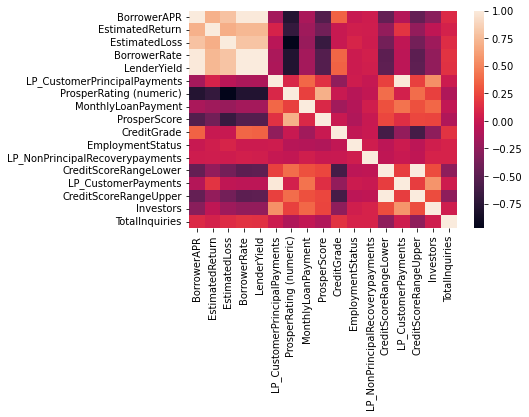

In [1094]:
corr = important_features.corr()
sns.heatmap(corr)

In [1095]:

def select_high_correlation_features(df, threshold=0.7):
    """
    Selects features with a correlation coefficient higher than the specified threshold.
    
    Args:
        df (pandas.DataFrame): Input DataFrame containing the features.
        threshold (float): The threshold value for the correlation coefficient.
    
    Returns:
        A list of feature names with correlation coefficients higher than the threshold.
    """
    # Calculate the correlation matrix
    corr_matrix = df.corr()
    
    # Find the features with correlation higher than the threshold
    high_corr_features = []
    for col in corr_matrix.columns:
        corr_values = corr_matrix.loc[:, col]
        high_corr_cols = corr_values[corr_values > threshold].index.tolist()
        high_corr_cols.remove(col)
        high_corr_features.extend(high_corr_cols)
    
    # Remove duplicates from the list of high correlation features
    high_corr_features = list(set(high_corr_features))
    
    return high_corr_features
select_high_correlation_features(important_features)

['BorrowerAPR',
 'CreditScoreRangeLower',
 'CreditScoreRangeUpper',
 'LP_CustomerPrincipalPayments',
 'EstimatedReturn',
 'LenderYield',
 'LP_CustomerPayments',
 'EstimatedLoss',
 'BorrowerRate']

In [1096]:
most_important=important_features[['BorrowerAPR','CreditScoreRangeLower','CreditScoreRangeUpper','LP_CustomerPrincipalPayments','EstimatedReturn',
                                  'LenderYield','LenderYield','LP_CustomerPayments','EstimatedLoss','BorrowerRate']]

In [1097]:
most_important

,BorrowerAPR,CreditScoreRangeLower,CreditScoreRangeUpper,LP_CustomerPrincipalPayments,EstimatedReturn,LenderYield,LenderYield,LP_CustomerPayments,EstimatedLoss,BorrowerRate
0,0.461872,0.727273,0.727273,0.269286,0.480569,0.428986,0.428986,0.281097,0.523288,0.464706
1,0.330849,0.772727,0.772727,0.000000,0.270791,0.266667,0.266667,0.000058,0.138793,0.270588
2,0.804076,0.545455,0.545455,0.085743,0.480569,0.724638,0.724638,0.103304,0.523288,0.808824
3,0.345756,0.909091,0.909091,0.116888,0.297667,0.282319,0.282319,0.126894,0.138793,0.286471
4,0.697656,0.772727,0.772727,0.044663,0.453144,0.604348,0.604348,0.069598,0.607911,0.613235
...,...,...,...,...,...,...,...,...,...,...
113932,0.631853,0.795455,0.795455,0.063954,0.475152,0.540290,0.540290,0.090006,0.451076,0.548235
113933,0.365905,0.795455,0.795455,0.057062,0.402637,0.321739,0.321739,0.057531,0.104788,0.326471
113934,0.679313,0.795455,0.795455,0.005233,0.428398,0.623188,0.623188,0.013540,0.677307,0.632353
113935,0.808123,0.772727,0.772727,0.428571,0.802231,0.755072,0.755072,0.520959,0.555864,0.766176


## PCA 

In [1098]:
from sklearn.decomposition import PCA

# Create principal components
pca = PCA()
X_pca = pca.fit_transform(most_important)

In [1099]:
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-0.124115,0.241225,0.089157,0.142457,0.027731,0.000278,0.004490,0.023976,-1.745548e-17,-3.692089e-18
1,-0.608891,-0.192123,-0.060707,0.058315,-0.013725,0.016820,0.002690,-0.002190,2.450334e-15,1.697408e-16
2,0.470153,-0.058073,-0.201118,0.259341,0.011584,0.002628,0.000567,0.052574,1.629938e-17,2.250159e-18
3,-0.607593,0.008186,-0.071424,-0.101021,-0.067163,0.005348,0.003877,0.001054,1.372615e-18,-5.547213e-18
4,0.230684,-0.053721,0.037365,-0.004102,-0.064058,0.015688,0.011479,-0.001376,-3.045685e-19,-1.909671e-18


loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  index=important_features.columns,   # so the columns are the principal components and the rows are the original features
)
loadings